Big Mart Sales Prediction Using Machine Learning
1. Item_Identifier – Unique code of the product
2. Item_Weight – Weight of the product
3. Item_Fat_Content – Fat level (Low Fat / Regular)
4. Item_Visibility – How much the product is displayed in store
5. Item_Type – Category of the product (e.g., Snacks, Dairy)
6. Item_MRP – Price of the product
7. Outlet_Identifier – Unique code of the store
8. Outlet_Establishment_Year – Year the store opened
9. Outlet_Size – Store size (Small / Medium / Large)
10. Outlet_Location_Type – City type (Tier 1/2/3)
11. Outlet_Type – Type of store (Supermarket/Grocery)
12. Item_Outlet_Sales – Sales of that product in that store (Target)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Retail Mart Sales Prediction_train_data.csv")

In [3]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
dataset.shape

(8523, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
dataset.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
dataset.duplicated().sum()

np.int64(0)

In [8]:
dataset = dataset.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [9]:
dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [10]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [11]:
dataset['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [12]:
#Handle Null values
dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(), inplace=True)
dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0], inplace=True)

C:\Users\Vaishali Kanadje\AppData\Local\Temp\ipykernel_18212\1674355624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(), inplace=True)
C:\Users\Vaishali Kanadje\AppData\Local\Temp\ipykernel_18212\1674355624.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [13]:
dataset.isna().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

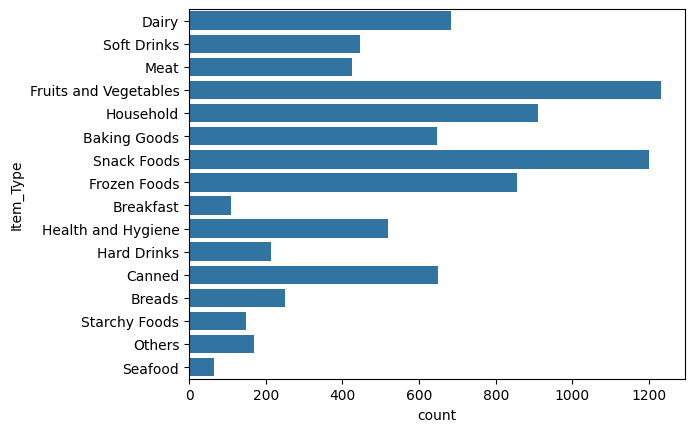

In [14]:
sns.countplot(dataset['Item_Type'])
plt.show()

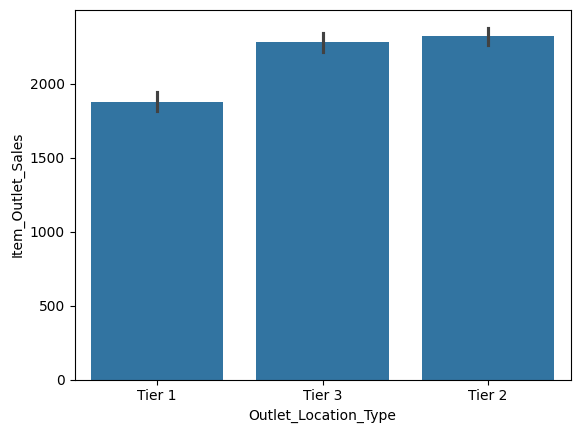

In [15]:
sns.barplot(dataset,x='Outlet_Location_Type',y='Item_Outlet_Sales')
plt.show()
#According to Visualization Tier2(mid developed city) having more Sales

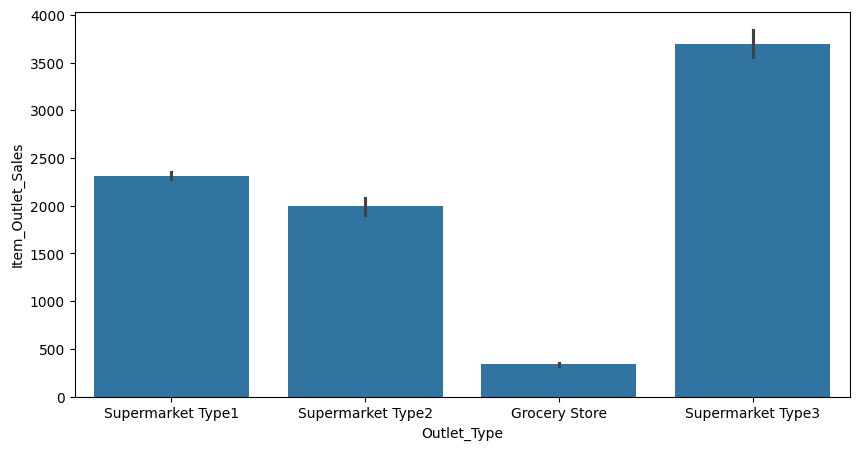

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(dataset,x='Outlet_Type',y='Item_Outlet_Sales')
plt.show()
#According to visualization Supermarket Type3 having more Sales

In [17]:
dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [18]:
dataset['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [19]:
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace({'LF': 'Low Fat',
                                                         'low fat': 'Low Fat', 'reg': 'Regular'})

In [20]:
dataset['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [21]:
dataset['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [22]:
dataset['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Data Encoding

In [23]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
le = LabelEncoder()

In [24]:
dataset['Item_Fat_Content'] = le.fit_transform(dataset['Item_Fat_Content'])

In [25]:
oe = OrdinalEncoder(categories=[['Small','Medium','High']])
dataset['Outlet_Size'] = oe.fit_transform(dataset[['Outlet_Size']]).astype('int')

In [26]:
oe = OrdinalEncoder(categories=[['Tier 3','Tier 2','Tier 1']])   #Tier1=Developed City  Tier2=Mid-Develop  Tier3=Small Town
dataset['Outlet_Location_Type'] = oe.fit_transform(dataset[['Outlet_Location_Type']]).astype('int')

In [27]:
dataset['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [28]:
oe = OrdinalEncoder(categories=[['Grocery Store','Supermarket Type1','Supermarket Type2','Supermarket Type3']])
dataset['Outlet_Type'] = oe.fit_transform(dataset[['Outlet_Type']]).astype('int')

In [29]:
dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,Dairy,249.8092,1,2,1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,1,0,2,443.4228
2,17.50,0,0.016760,Meat,141.6180,1,2,1,2097.2700
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,0,0,732.3800
4,8.93,0,0.000000,Household,53.8614,2,0,1,994.7052


In [30]:
dataset = pd.get_dummies(dataset,columns=['Item_Type'],dtype='int')

In [31]:
dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,249.8092,1,2,1,3735.1380,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,1,0,2,443.4228,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,2,1,2097.2700,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,1,0,0,732.3800,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,2,0,1,994.7052,0,0,...,0,0,0,1,0,0,0,0,0,0


In [32]:
dataset.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,140.992782,0.829168,0.887129,1.201220,2181.288914,0.076030,0.029450,...,0.144550,0.025109,0.061011,0.106770,0.049865,0.019829,0.007509,0.140795,0.052212,0.017365
std,4.226124,0.477836,0.051598,62.275067,0.600327,0.812757,0.796459,1706.499616,0.265061,0.169073,...,0.351667,0.156464,0.239365,0.308839,0.217679,0.139420,0.086334,0.347831,0.222467,0.130634
min,4.555000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,33.290000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.026989,93.826500,0.000000,0.000000,1.000000,834.247400,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.000000,0.053931,143.012800,1.000000,1.000000,1.000000,1794.331000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,1.000000,0.094585,185.643700,1.000000,2.000000,1.000000,3101.296400,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,1.000000,0.328391,266.888400,2.000000,2.000000,3.000000,13086.964800,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


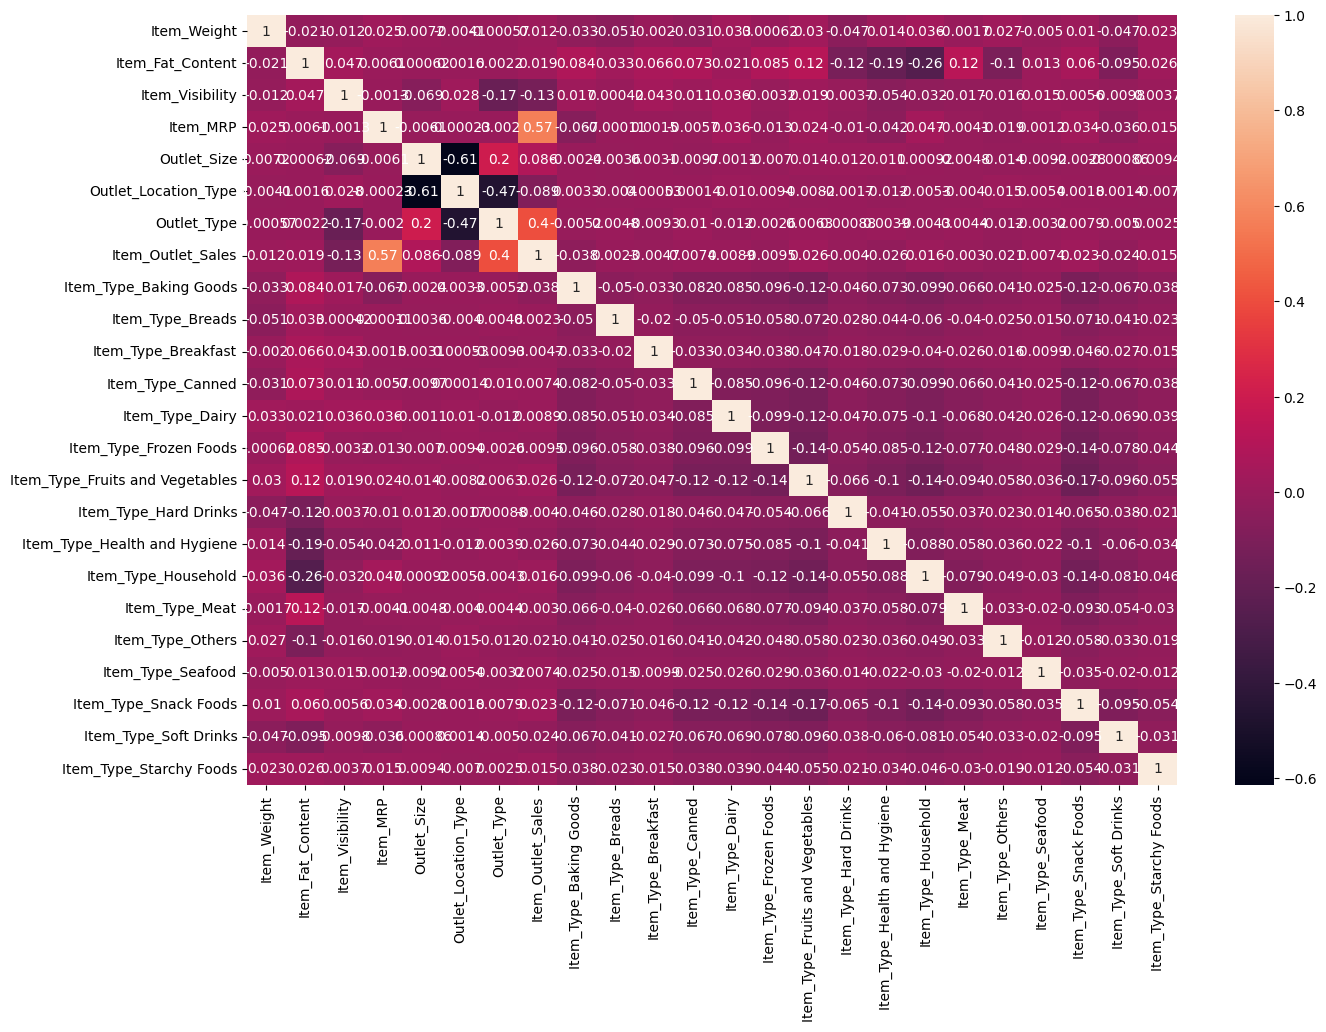

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [34]:
dataset.corr()['Item_Outlet_Sales']

Item_Weight                        0.011550
Item_Fat_Content                   0.018719
Item_Visibility                   -0.128625
Item_MRP                           0.567574
Outlet_Size                        0.086182
Outlet_Location_Type              -0.089367
Outlet_Type                        0.401522
Item_Outlet_Sales                  1.000000
Item_Type_Baking Goods            -0.038381
Item_Type_Breads                   0.002332
Item_Type_Breakfast               -0.004656
Item_Type_Canned                   0.007387
Item_Type_Dairy                    0.008858
Item_Type_Frozen Foods            -0.009482
Item_Type_Fruits and Vegetables    0.025950
Item_Type_Hard Drinks             -0.003956
Item_Type_Health and Hygiene      -0.025587
Item_Type_Household                0.015701
Item_Type_Meat                    -0.002995
Item_Type_Others                  -0.021267
Item_Type_Seafood                  0.007380
Item_Type_Snack Foods              0.022782
Item_Type_Soft Drinks           

In [35]:
dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,249.8092,1,2,1,3735.1380,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,1,0,2,443.4228,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,2,1,2097.2700,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,1,0,0,732.3800,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,2,0,1,994.7052,0,0,...,0,0,0,1,0,0,0,0,0,0


In [36]:
dataset['Item_Visibility'] = dataset['Item_Visibility'].round()
dataset['Item_MRP'] = dataset['Item_MRP'].round()
dataset['Item_Outlet_Sales'] = dataset['Item_Outlet_Sales'].round()
dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.0,250.0,1,2,1,3735.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.0,48.0,1,0,2,443.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.0,142.0,1,2,1,2097.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.0,182.0,1,0,0,732.0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.0,54.0,2,0,1,995.0,0,0,...,0,0,0,1,0,0,0,0,0,0


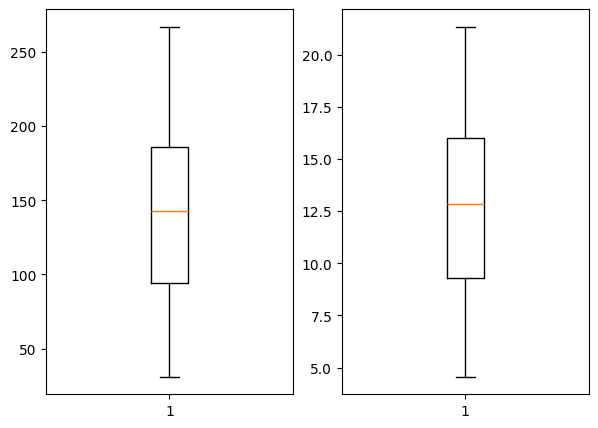

In [37]:
#Outlier Checking
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
plt.boxplot(dataset['Item_MRP'])
plt.subplot(1,2,2)
plt.boxplot(dataset['Item_Weight'])
plt.show()

In [38]:
mean = dataset['Item_Outlet_Sales'].mean()
std = dataset['Item_Outlet_Sales'].std()

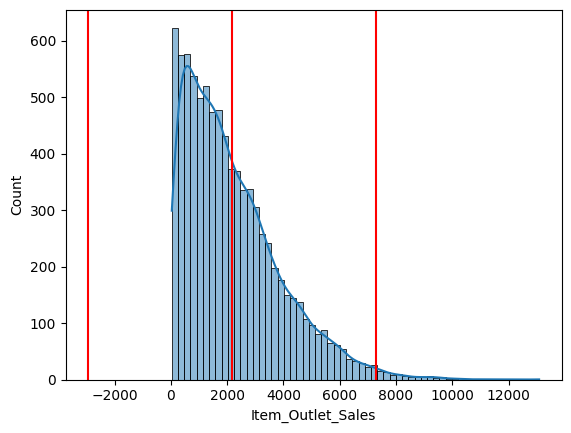

In [39]:
sns.histplot(dataset['Item_Outlet_Sales'],kde=True)
plt.axvline(mean,color='red')
plt.axvline(mean-3*std,color='red')
plt.axvline(mean+3*std,color='red')
plt.show()

In [40]:
#Replace outlier values with the upper bound (mean + 3*std).
upper_bound = mean + 3*std
dataset['Item_Outlet_Sales'] = dataset['Item_Outlet_Sales'].clip(upper=upper_bound)

In [41]:
dataset[dataset['Item_Outlet_Sales']>mean+3*std]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods


In [42]:
##VIF for remove less important columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
def calVIF(input1):
    vif = []
    for i in range(input1.shape[1]):
        vif.append(variance_inflation_factor(input1.values,i))
    result = pd.DataFrame()
    result['Attributes']=input1.columns
    result['VIF']=vif
    return result

In [44]:
result = calVIF(dataset.drop('Item_Outlet_Sales',axis=1))
result

C:\Users\Vaishali Kanadje\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Attributes,VIF
0,Item_Weight,1.013967
1,Item_Fat_Content,1.215567
2,Item_Visibility,NaN
3,Item_MRP,1.013095
4,Outlet_Size,1.632070
5,Outlet_Location_Type,2.002127
6,Outlet_Type,1.299439
7,Item_Type_Baking Goods,3.194678
8,Item_Type_Breads,1.838266
9,Item_Type_Breakfast,1.402129


In [45]:
X = dataset.drop('Item_Outlet_Sales',axis=1)
y = dataset['Item_Outlet_Sales']

In [46]:
#Divide data for training and testing
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [62]:
x_train.shape

(6818, 23)

In [63]:
x_test.shape

(1705, 23)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score,mean_squared_error

In [65]:
le = LinearRegression()  #Create model

In [66]:
le.fit(x_train,y_train)  #Train model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
pred_test = le.predict(x_test)

In [68]:
r2_score(y_test,pred_test)

0.49965558035578306

In [69]:
result = cross_validate(le,x_train,y_train)
result

{'fit_time': array([0.01494932, 0.01784182, 0.01725769, 0.01651549, 0.01722574]),
 'score_time': array([0.00452423, 0.00596046, 0.00423431, 0.00789833, 0.00412226]),
 'test_score': array([0.51089247, 0.50513104, 0.51950997, 0.52420524, 0.49303917])}

In [70]:
result['test_score'].mean()

np.float64(0.5105555790391818)